In [13]:
import findspark

In [14]:
findspark.init()
findspark.find()

'C:\\Users\\user\\anaconda3\\lib\\site-packages\\pyspark'

In [15]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [16]:
spark

In [17]:
Electronic_prducts = spark.read.format("csv").option("header", "true").option("nullValue","N/A").option("inferSchema", "true").load(r"C:\Users\user\Downloads\DatafinitiElectronicsProductsPricingData\DatafinitiElectronicsProductsPricingData.csv")
Electronic_prducts.show(5)

+--------------------+----------------+----------------+-------------------+----------------+---------------+--------------------+-------------+---------------+---------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+----+--------------------+--------------------+------------+------------------+--------------------+-----------------+--------------------+-----------+-----------+----+----+----+----+----+
|                  id|prices.amountMax|prices.amountMin|prices.availability|prices.condition|prices.currency|     prices.dateSeen|prices.isSale|prices.merchant|prices.shipping|   prices.sourceURLs|               asins|  brand|          categories|           dateAdded|         dateUpdated| ean|           imageURLs|                keys|manufacturer|manufacturerNumber|                name|primaryCategories|          sourceURLs|        upc|     weight|_c26|_c27|_c28|_c29|_c30|
+--------------------+----------------+-----

In [18]:
Electronic_prducts.describe()

DataFrame[summary: string, id: string, prices.amountMax: string, prices.amountMin: string, prices.availability: string, prices.condition: string, prices.currency: string, prices.dateSeen: string, prices.isSale: string, prices.merchant: string, prices.shipping: string, prices.sourceURLs: string, asins: string, brand: string, categories: string, dateAdded: string, dateUpdated: string, ean: string, imageURLs: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, primaryCategories: string, sourceURLs: string, upc: string, weight: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string]

In [19]:
Electronic_prducts.columns

['id',
 'prices.amountMax',
 'prices.amountMin',
 'prices.availability',
 'prices.condition',
 'prices.currency',
 'prices.dateSeen',
 'prices.isSale',
 'prices.merchant',
 'prices.shipping',
 'prices.sourceURLs',
 'asins',
 'brand',
 'categories',
 'dateAdded',
 'dateUpdated',
 'ean',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'name',
 'primaryCategories',
 'sourceURLs',
 'upc',
 'weight',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30']

In [20]:
Electronic_prducts.printSchema()

root
 |-- id: string (nullable = true)
 |-- prices.amountMax: double (nullable = true)
 |-- prices.amountMin: double (nullable = true)
 |-- prices.availability: string (nullable = true)
 |-- prices.condition: string (nullable = true)
 |-- prices.currency: string (nullable = true)
 |-- prices.dateSeen: string (nullable = true)
 |-- prices.isSale: string (nullable = true)
 |-- prices.merchant: string (nullable = true)
 |-- prices.shipping: string (nullable = true)
 |-- prices.sourceURLs: string (nullable = true)
 |-- asins: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: string (nullable = true)
 |-- dateUpdated: string (nullable = true)
 |-- ean: string (nullable = true)
 |-- imageURLs: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- primaryCategories: string (nullable =

In [21]:
Electronic_prducts.count()

14592

In [22]:
Electronic_prducts=Electronic_prducts.dropDuplicates()
Electronic_prducts

DataFrame[id: string, prices.amountMax: double, prices.amountMin: double, prices.availability: string, prices.condition: string, prices.currency: string, prices.dateSeen: string, prices.isSale: string, prices.merchant: string, prices.shipping: string, prices.sourceURLs: string, asins: string, brand: string, categories: string, dateAdded: string, dateUpdated: string, ean: string, imageURLs: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, primaryCategories: string, sourceURLs: string, upc: string, weight: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string]

In [23]:
Electronic_prducts.count()

14579

In [24]:
Electronic_prducts=Electronic_prducts.withColumnRenamed("prices.amountMax", "Amount_Max") \
     .withColumnRenamed("prices.amountMin", "Amount_Min") \
     .withColumnRenamed("prices.availability", "Availability") \
     .withColumnRenamed("prices.condition", "Condition") \
     .withColumnRenamed("prices.currency", "Currency") \
     .withColumnRenamed("prices.dateSeen", "DateSeen") \
     .withColumnRenamed("prices.isSale", "Is_Sale") \
     .withColumnRenamed("prices.merchant", "Merchant") \
     .withColumnRenamed("prices.shipping", "Shipping") \
     .withColumnRenamed("prices.sourceURLs", "Source")

In [25]:
Electronic_prducts=Electronic_prducts.drop('id','_c26','_c27','_c28','_c29','_c30','ean','keys','manufacturerNumber','shipping','sourceURLs','upc','imageURLs','currency')

In [26]:
All_values=Electronic_prducts.count()
for col in Electronic_prducts.columns:
    empty_column=(Electronic_prducts.filter(Electronic_prducts[col].isNull())).count()
    Null_Percentage=empty_column/All_values
    print(col, ' with null values ', Null_Percentage)

Amount_Max  with null values  0.0
Amount_Min  with null values  0.0
Availability  with null values  0.13142190822415803
Condition  with null values  0.09561698333219014
DateSeen  with null values  0.0
Is_Sale  with null values  0.0
Merchant  with null values  0.05219836751491872
Source  with null values  0.0
asins  with null values  0.0
brand  with null values  0.0
categories  with null values  0.0
dateAdded  with null values  0.0
dateUpdated  with null values  0.0
manufacturer  with null values  0.4780163248508128
name  with null values  0.0
primaryCategories  with null values  0.0
weight  with null values  0.0


In [27]:
Column_missing=[]
for col in Electronic_prducts.columns:
    empty_column=(Electronic_prducts.filter(Electronic_prducts[col].isNull())).count()
    if empty_column>0:
        Column_missing.append(col)
        print(Column_missing)

['Availability']
['Availability', 'Condition']
['Availability', 'Condition', 'Merchant']
['Availability', 'Condition', 'Merchant', 'manufacturer']


In [28]:
Electronic_prducts2 = Electronic_prducts.na.drop()

In [29]:
All_values=Electronic_prducts2.count()
for col in Electronic_prducts2.columns:
    empty_column=(Electronic_prducts2.filter(Electronic_prducts2[col].isNull())).count()
    Null_Percentage=empty_column/All_values
    print(col, ' with null values ',Null_Percentage)

Amount_Max  with null values  0.0
Amount_Min  with null values  0.0
Availability  with null values  0.0
Condition  with null values  0.0
DateSeen  with null values  0.0
Is_Sale  with null values  0.0
Merchant  with null values  0.0
Source  with null values  0.0
asins  with null values  0.0
brand  with null values  0.0
categories  with null values  0.0
dateAdded  with null values  0.0
dateUpdated  with null values  0.0
manufacturer  with null values  0.0
name  with null values  0.0
primaryCategories  with null values  0.0
weight  with null values  0.0


In [30]:
Electronic_prducts2.groupBy('brand').count().show()

+--------------+-----+
|         brand|count|
+--------------+-----+
|       Crosley|    5|
|          naxa|    9|
|         Denon|   58|
|         Thule|    9|
|        Papago|   15|
| Grace Digital|   33|
|  Twelve South|    4|
|         Razer|   95|
|         Onkyo|   78|
|          Sima|   10|
|Master Dynamic|    5|
|           JBL|   60|
|    SunbriteTV|    2|
|      myCharge|    9|
|       TP-Link|   35|
|       Kenwood|  141|
|           RCA|   12|
|         Beats|    4|
|      Fujifilm|  119|
|Power Acoustik|   35|
+--------------+-----+
only showing top 20 rows



In [31]:
Electronic_prducts2.select("Amount_Max").describe().show()

+-------+------------------+
|summary|        Amount_Max|
+-------+------------------+
|  count|              6164|
|   mean|430.94867618429237|
| stddev| 727.2681814904798|
|    min|               1.0|
|    max|           6499.99|
+-------+------------------+



In [32]:
Electronic_prducts2.select('Categories').distinct().show()

+--------------------+
|          Categories|
+--------------------+
|In-Wall & In-Ceil...|
|Computers,Pro Aud...|
|TVs & Electronics...|
|Electronics,TV & ...|
|Camera & Photo Ac...|
|Audio & Video Acc...|
|Accessories,Porta...|
|Camera Accessorie...|
|Computers,Compute...|
|Stereos,Outdoor S...|
|Integrated Amplif...|
|Stereos,Home Thea...|
|Compact Stereos,M...|
|Audio & Video Acc...|
|Computers,Network...|
|Audio & Video Acc...|
|Pro Audio,Shotgun...|
|Computers,Tablets...|
|Receivers Amplifi...|
|Computers,Tablet ...|
+--------------------+
only showing top 20 rows



In [33]:
import pyspark.sql.functions as f

split_criteria = f.split(Electronic_prducts2.categories,",")
Electronic_prducts2=Electronic_prducts2.withColumn('Category', split_criteria.getItem(0))
Electronic_prducts2=Electronic_prducts2.drop('Categories')
Electronic_prducts2.select('Category').distinct().count()

135

In [34]:
Electronic_prducts2.groupBy('brand').count().orderBy('count',ascending=False).show()

+---------------+-----+
|          brand|count|
+---------------+-----+
|           Sony|  653|
|          Apple|  621|
|        Samsung|  468|
|        Pioneer|  166|
|         Yamaha|  150|
|        Kenwood|  141|
|          Canon|  140|
|       Fujifilm|  119|
|          Razer|   95|
|  Elite Screens|   90|
|          Nikon|   83|
|          Onkyo|   78|
|         Garmin|   76|
|       Logitech|   75|
|        SanDisk|   70|
|House of Marley|   64|
|        Lowepro|   63|
|            JBL|   60|
|        Seagate|   59|
|          Denon|   58|
+---------------+-----+
only showing top 20 rows



In [35]:
Electronic_prducts2.groupBy('Is_Sale').count().show()

+--------------------+-----+
|             Is_Sale|count|
+--------------------+-----+
|               FALSE| 4806|
| 3/4"" silk dome ...|    1|
|                TRUE| 1352|
|    4 ohms impedance|    1|
| Depth: 6.5"" (16...|    1|
| Compact-Space Sa...|    1|
| Remote Control I...|    2|
+--------------------+-----+



In [36]:
Electronic_prducts2=Electronic_prducts2.filter(Electronic_prducts2.Is_Sale.isin(["FALSE","TRUE"]))
Electronic_prducts2.groupBy('Is_Sale').count().show()

+-------+-----+
|Is_Sale|count|
+-------+-----+
|  FALSE| 4806|
|   TRUE| 1352|
+-------+-----+



In [37]:
! pip install pyspark_dist_explore

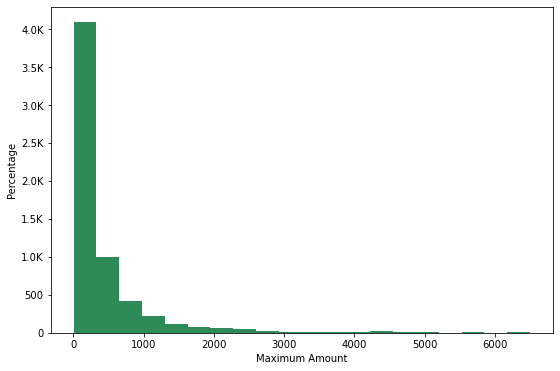

In [38]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(9, 6))
hist(ax, Electronic_prducts2.select('Amount_Max'), bins = 20,color='seagreen')
plt.xlabel('Maximum Amount')
plt.ylabel('Percentage')
plt.show()

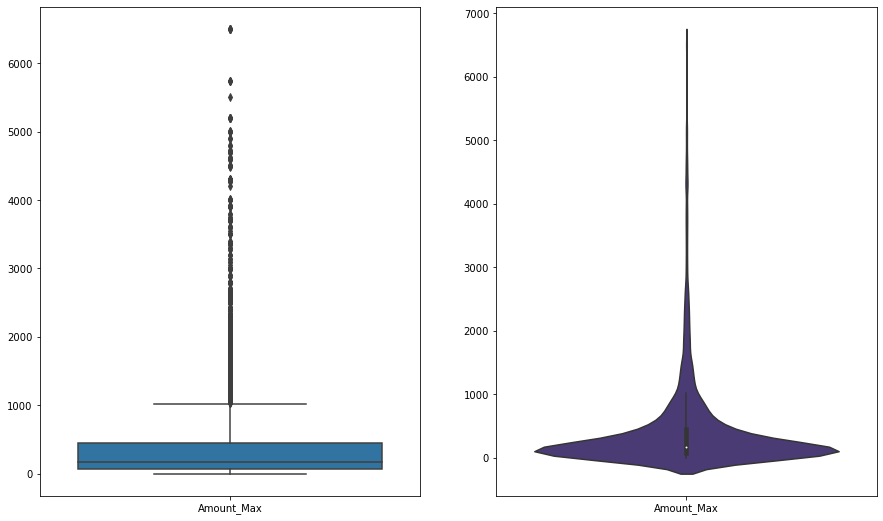

In [40]:
import seaborn as sns

Violin_plot=Electronic_prducts2.select('Amount_Max').toPandas()
fig=plt.figure(figsize=(15,9))
ax=fig.add_subplot(1,2,1)
ax=sns.boxplot(data=Violin_plot)
sns.set_palette("viridis")
ax=fig.add_subplot(1,2,2)
ax=sns.violinplot(data=Violin_plot)

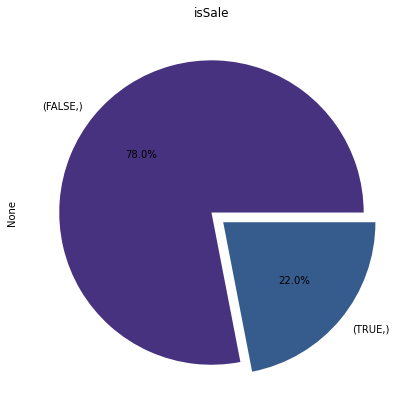

In [41]:
#fig, axs = plt.subplots(2, 2)
fig = plt.figure(figsize =(10, 7))
Electronic_prducts2.select('Is_Sale').toPandas().value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.title('isSale')
plt.show()

Text(0.5, 1.0, 'Scatter Plot')

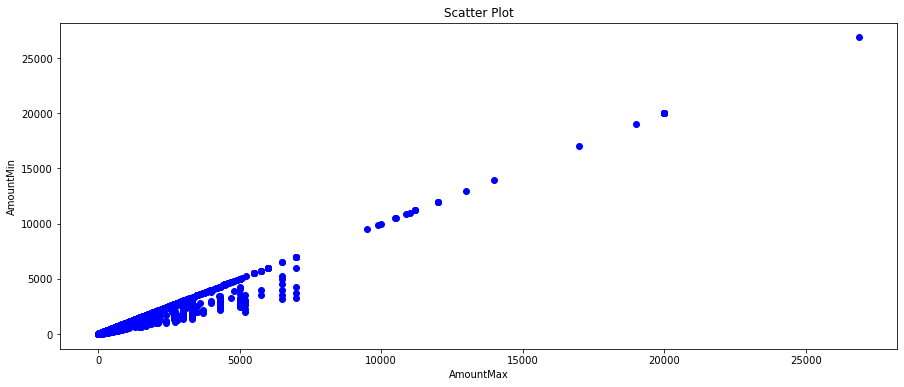

In [42]:
x1=Electronic_prducts.toPandas()['Amount_Max'].values.tolist()
y1=Electronic_prducts.toPandas()['Amount_Min'].values.tolist()
fig=plt.figure(figsize=(15,6))
plt.scatter(x1,y1,color='blue')
plt.xlabel('AmountMax')
plt.ylabel('AmountMin')
plt.title('Scatter Plot')

['Computers', 'Electronics', 'Stereos', 'Digital Cameras', 'Auto & Tires']


[Text(0.5, 0, 'Price'), Text(0, 0.5, 'Category')]

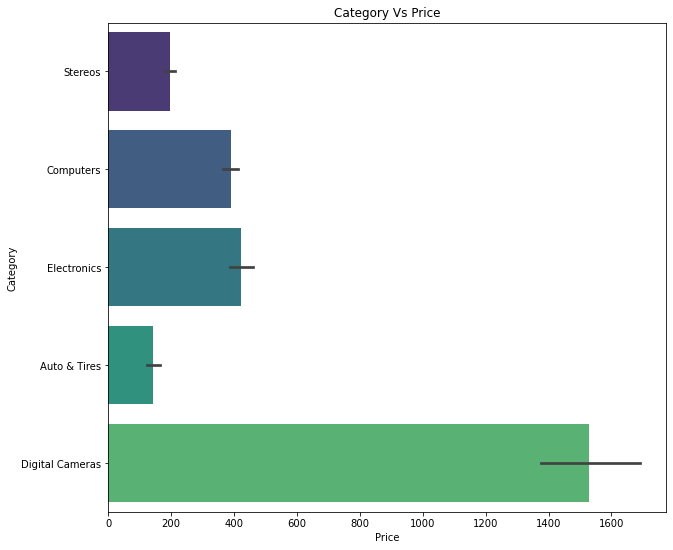

In [43]:
Category=Electronic_prducts2.groupBy('Category').count().orderBy('count',ascending=False)
Category=Category.toPandas()

Category=Category[:5]
top5=list(Category.Category)
print(top5)
Category=Electronic_prducts2.filter(Electronic_prducts2.Category.isin(top5)).toPandas()
fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='Amount_Min', y='Category', data=Category).set_title('Category Vs Price')
ax.set(xlabel='Price', ylabel='Category')

['Computers', 'Electronics', 'Stereos', 'Digital Cameras', 'Auto & Tires']


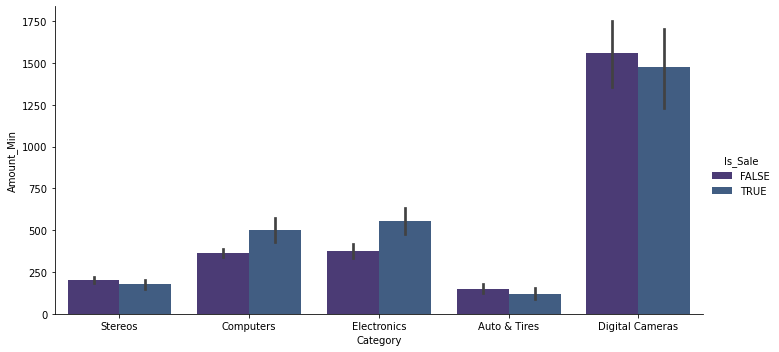

In [44]:
Category=Electronic_prducts2.groupBy('Category').count().orderBy('count',ascending=False)
Category=Category.toPandas()
# taking top 5 categories
Category=Category[:5]
top5=list(Category.Category)
print(top5)
Category=Electronic_prducts2.filter(Electronic_prducts2.Category.isin(top5)).toPandas()
sns.catplot(x="Category", y="Amount_Min", hue="Is_Sale", kind="bar", data=Category, aspect=2)

In [45]:
Electronic_prducts2.columns

['Amount_Max',
 'Amount_Min',
 'Availability',
 'Condition',
 'DateSeen',
 'Is_Sale',
 'Merchant',
 'Source',
 'asins',
 'brand',
 'dateAdded',
 'dateUpdated',
 'manufacturer',
 'name',
 'primaryCategories',
 'weight',
 'Category']

In [46]:
import pyspark
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.classification import LogisticRegression

Categorical_Columns = ["Availability", "Condition", "Merchant", "asins", "manufacturer", "name", "brand", "weight", "Category"]
stages = [] # stages in Pipeline
for categoricalCol in Categorical_Columns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol="Is_Sale", outputCol="label")
stages += [label_stringIdx]

numericCols = ["Amount_Max", "Amount_Min"]
assemblerInputs = [c + "classVec" for c in Categorical_Columns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(Electronic_prducts2)
preppedDataDF = pipelineModel.transform(Electronic_prducts2)

# Fit model to prepped data
lrModel = LogisticRegression().fit(preppedDataDF)

In [47]:
Prefered_Cols = ["label", "features"] + Electronic_prducts2.columns
dataset = preppedDataDF.select(Prefered_Cols)

In [48]:
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed=100)

In [49]:
from pyspark.ml.classification import LogisticRegression
 
# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)
 
# Train model with Training Data
logic_reg_Model = lr.fit(trainingData)
predictions = logic_reg_Model.transform(testData)
selected = predictions.select("label", "prediction", "probability")

In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
# Evaluate model
Final_evaluator = BinaryClassificationEvaluator()
print("Test AUC", Final_evaluator.evaluate(predictions))

Test AUC 0.7874392437521528


In [51]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = ParamGridBuilder().build()


In [52]:
classifiers = []
classifiers.append(('LR', LogisticRegression(labelCol='label', featuresCol='features')))
classifiers.append(('DT', DecisionTreeClassifier(labelCol='label', featuresCol='features')))
classifiers.append(('RF', RandomForestClassifier(labelCol='label', featuresCol='features')))


In [53]:
DT = DecisionTreeClassifier(labelCol="label", featuresCol="features")
 
# Train model with Training Data
DecisionTree_Model = DT.fit(trainingData)
predictions_DT = DecisionTree_Model.transform(testData)
selected_DT = predictions_DT.select("label", "prediction", "probability")

In [54]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
# Evaluate model
DT_evaluator = BinaryClassificationEvaluator()
print("Test AUC", DT_evaluator.evaluate(predictions_DT))

Test AUC 0.4619268820084963


In [55]:
RF = RandomForestClassifier(labelCol='label', featuresCol='features')
 
# Train model with Training Data
Random_Model = RF.fit(trainingData)
predictions_RF = Random_Model.transform(testData)
selected_RF = predictions_RF.select("label", "prediction", "probability")

In [56]:
RF_evaluator = BinaryClassificationEvaluator()
print("Test AUC", RF_evaluator.evaluate(predictions_RF))

Test AUC 0.700482860678429
